In [1]:
import warnings

import pandas as pd
import torch

from era_data import TabletPeriodDataset, get_IDS
from VAE_model_tablets_class import VAE
from visualization_funcs import generate_mean_tablet_plot, hierarchical_clustering_and_dendrogram

# Filter out the FutureWarnings specifically for is_sparse
warnings.simplefilter(action='ignore', category=FutureWarning)

# Hyperparameters

In [2]:
IMG_DIR = 'output/images_preprocessed'
VERSION_NAME = 'period_clf_bs8_lr0.0001_beta_1_epochs_30-VAE-94936_samples-masked_w_classification_loss-equalpartsloss-April16_2'

#'period_clf_bs8_lr0.0001_beta_1_epochs_30-VAE-94936_samples-masked_w_classification_loss-equalpartsloss-April06'
IDS = get_IDS(IMG_DIR=IMG_DIR)
print(len(IDS))

94936


In [3]:
num_classes = len(TabletPeriodDataset.PERIOD_INDICES)

class_weights = torch.load("data/class_weights_period.pt")

# Load model

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [10]:
df_encodings_train = pd.read_csv(f'vae_encodings_and_data/vae_encoding_df_April16_w_class_train.csv')
df_encodings_test = pd.read_csv(f'vae_encodings_and_data/vae_encoding_df_April16_w_class_test.csv')

In [11]:
checkpoint_path = f'lightning_logs/{VERSION_NAME}/checkpoints/epoch=22-step=213621.ckpt'
vae_model = VAE.load_from_checkpoint(checkpoint_path,image_channels=1,z_dim=12, lr =0.001, use_classification_loss=True, num_classes=num_classes,
            loss_type="weighted", class_weights=class_weights, device = device)

/sise/mickyfi-group/kapond/AnalysisBySynthesis/VAE_model_tablets_class.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.class_weights = torch.tensor(class_weights).to(device)


# Plot - all periods

In [12]:
genre = ["Administrative"]

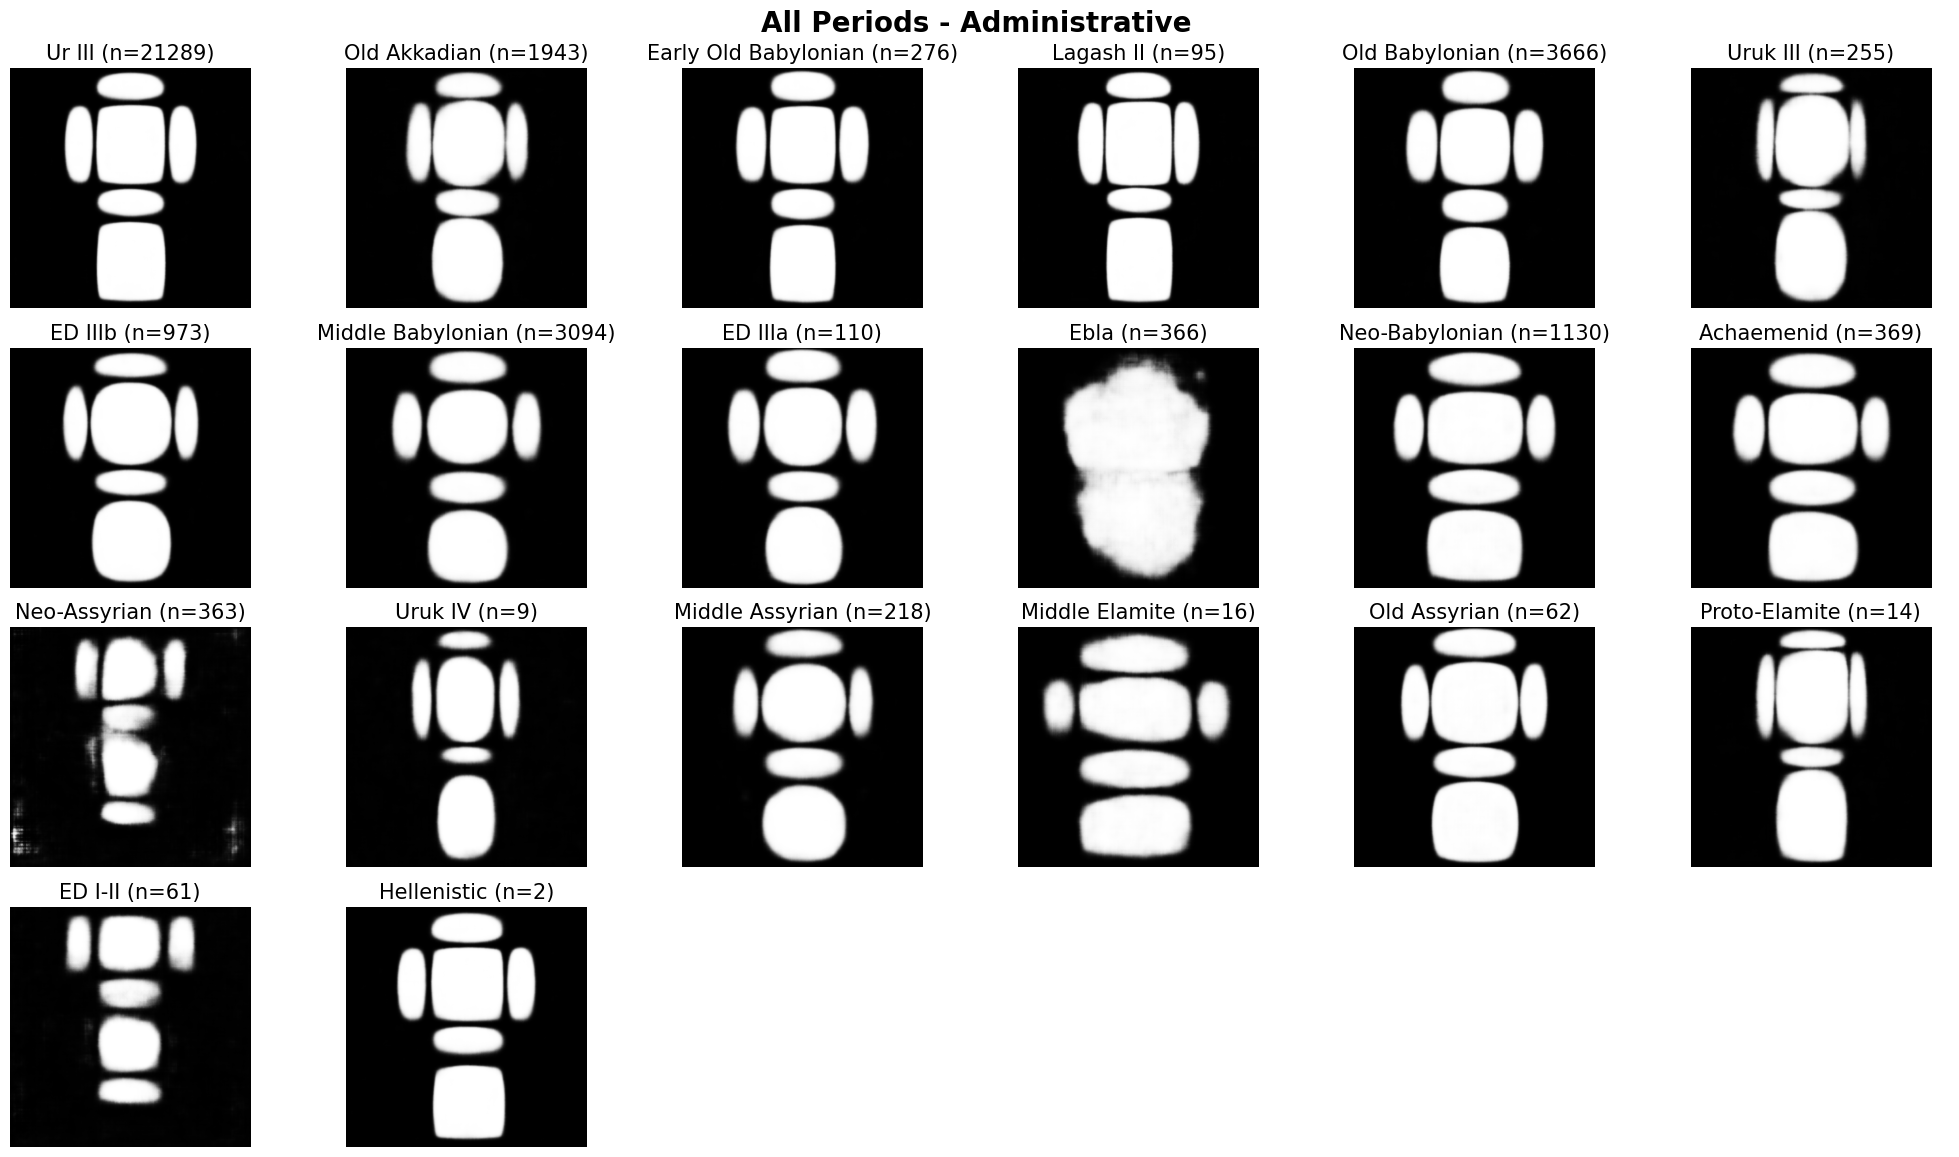

In [13]:
df_enc_genre_per_era = df_encodings_train[(df_encodings_train["Genre_Name"].isin(genre))]
mean_encodings_df = generate_mean_tablet_plot(df = df_enc_genre_per_era.drop(["Genre", "Genre_Name", "Period", "CDLI_id"], axis = 1), 
                          column_name = "Period_Name", model=vae_model, grid_title = "All Periods - "+', '.join(genre), 
                                              save_path="output/dendrogram_and_mean_tablets/"+",".join(genre)+"_genre_by_periods.png")

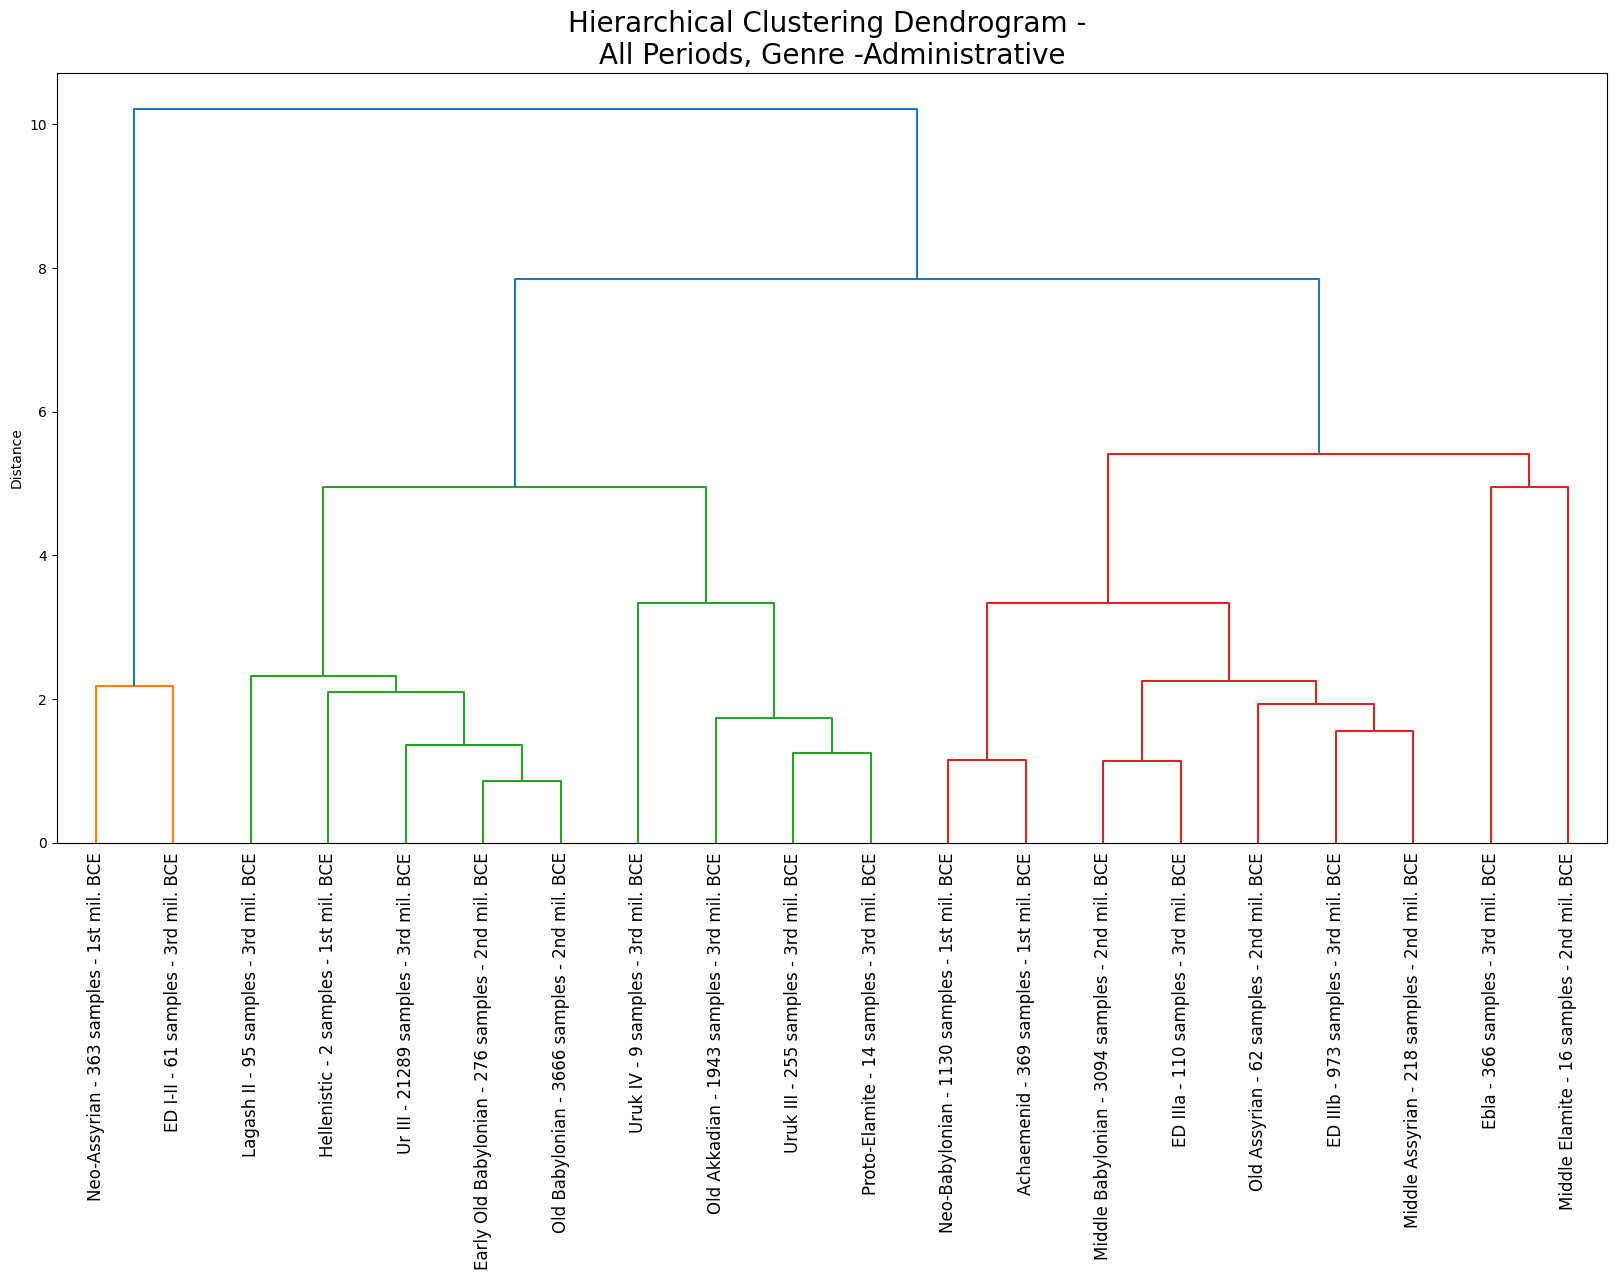

In [14]:
hierarchical_clustering_and_dendrogram(mean_encodings_df, "Period_Name", title = "\nAll Periods, Genre -"+', '.join(genre), figsize=(20, 10), title_font_size=20,
                                      save_path="output/dendrogram_and_mean_tablets/"+",".join(genre)+"_genre_dendrogram.png")

# Plot - Per Millennium

In [15]:
era_dict = {"3rd Millennium BCE": ['Uruk III', 'Uruk IV', 'Proto-Elamite', 'ED I-II', 'ED IIIa', 'ED IIIb', 'Ebla', 'Old Akkadian', 'Lagash II', 'Ur III'],
"2nd Millennium BCE":['Early Old Babylonian', 'Old Babylonian', 'Old Assyrian', 'Middle Assyrian', 'Middle Babylonian', 'Middle Elamite', 'Hittite'],
"1st Millennium BCE":['Neo-Babylonian', 'other', 'Neo-Assyrian', 'Hellenistic', 'Achaemenid']}

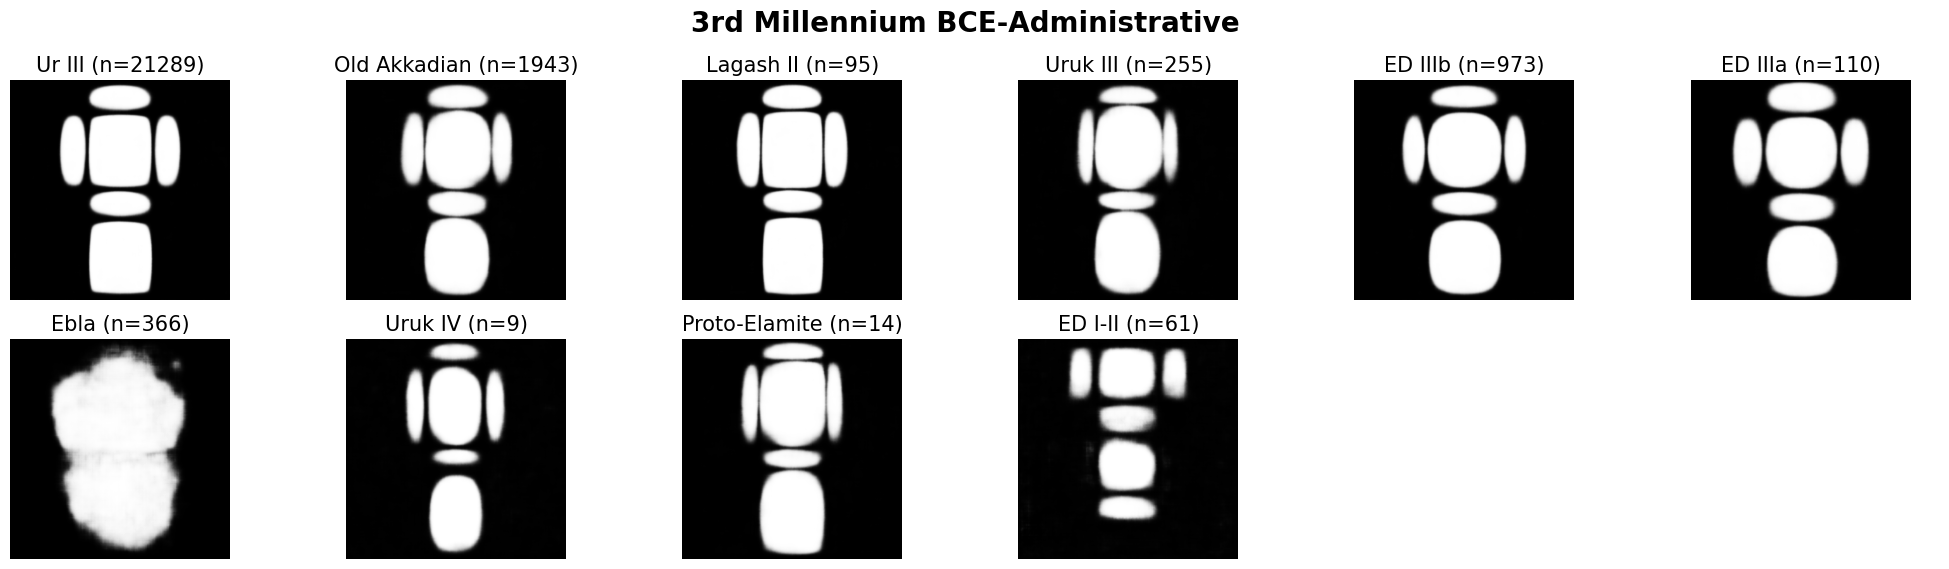

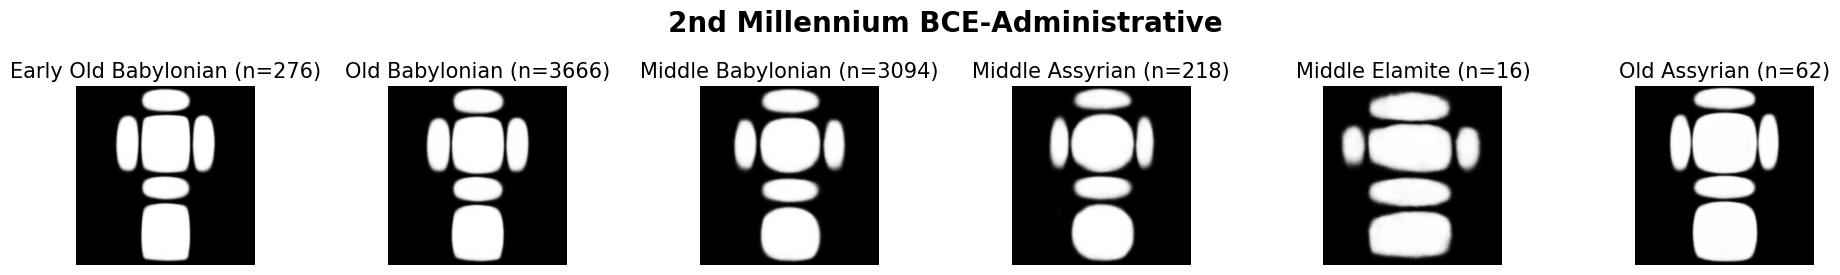

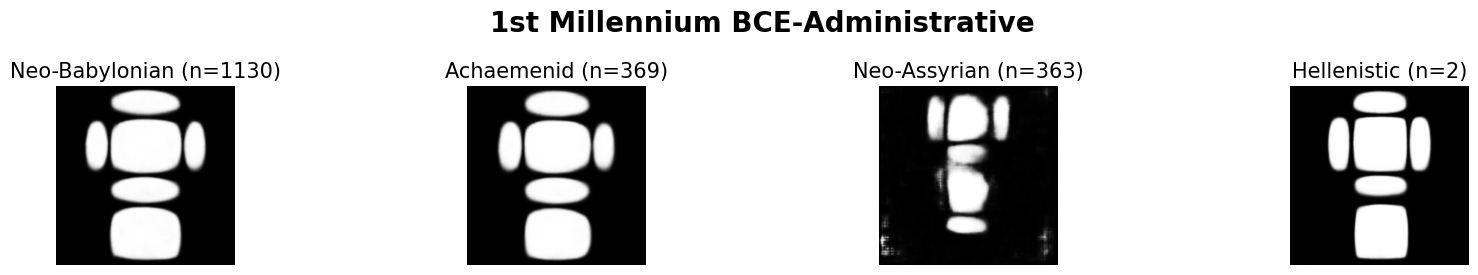

In [16]:
mean_encoding_dict={}
for era in era_dict.keys():
    df_enc_genre_per_era = df_encodings_train[(df_encodings_train["Genre_Name"].isin(genre))&(df_encodings_train["Period_Name"].isin(era_dict[era]))]
    mean_encodings_df = generate_mean_tablet_plot(df = df_enc_genre_per_era.drop(["Genre", "Genre_Name", "Period", "CDLI_id"], axis = 1), 
                              column_name = "Period_Name", model=vae_model, grid_title = era+'-'+', '.join(genre), 
                                                  save_path="output/dendrogram_and_mean_tablets/"+era+",".join(genre)+"_genre_by_periods.png")
    
    mean_encoding_dict[era]=mean_encodings_df

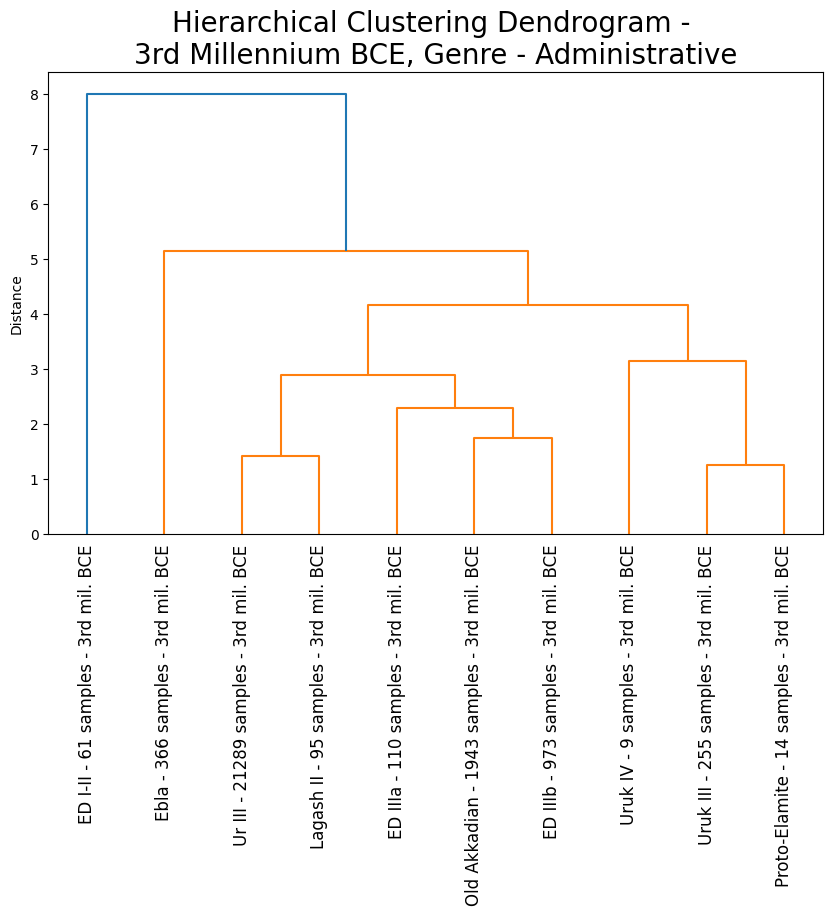

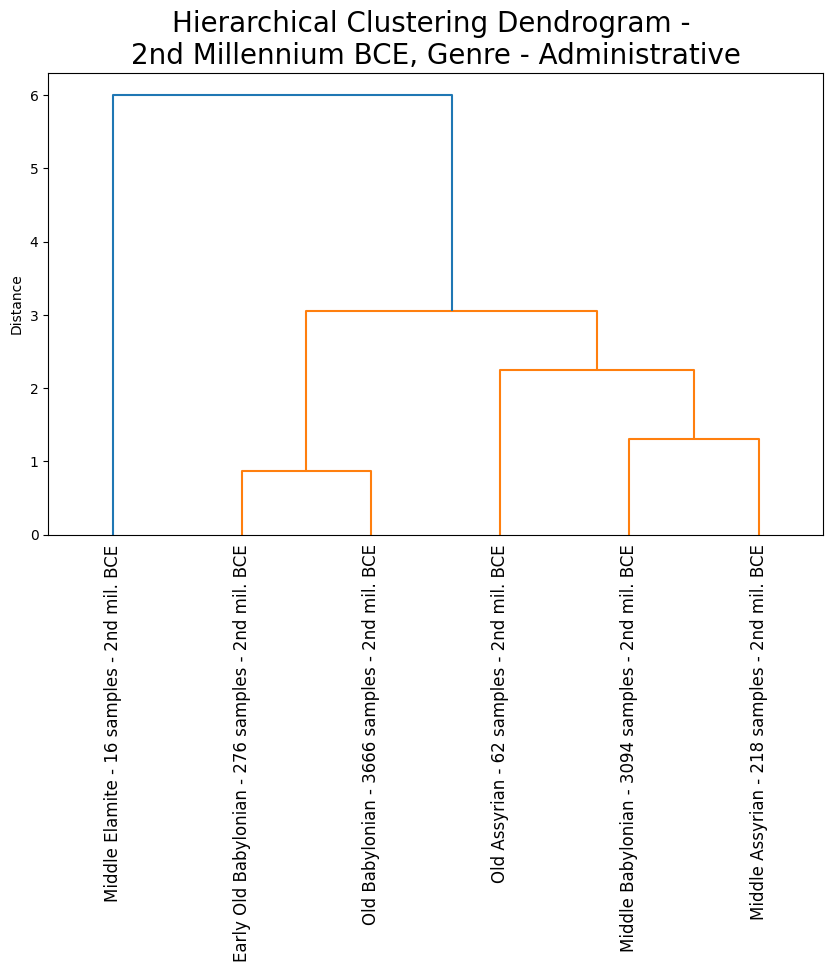

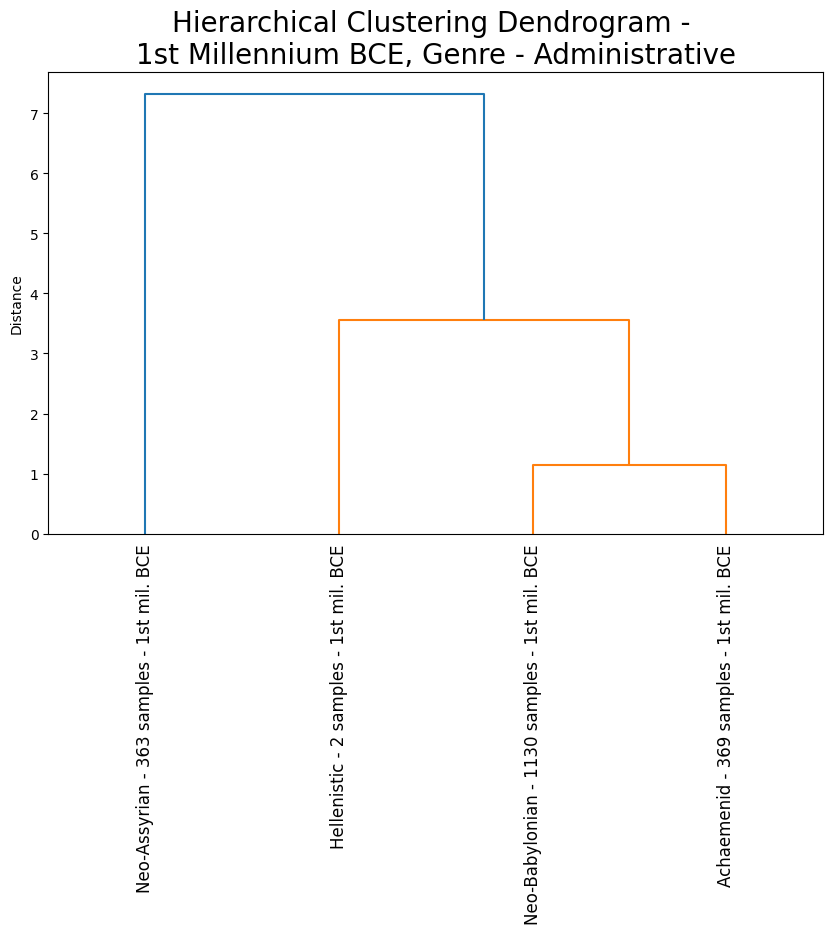

In [17]:
for era in era_dict.keys():
    hierarchical_clustering_and_dendrogram(mean_encoding_dict[era], "Period_Name", title = "\n"+era+", Genre - "+", ".join(genre), figsize=(10, 6), title_font_size=20,
                                          save_path = "output/dendrogram_and_mean_tablets/"+era+",".join(genre)+"_genre_dendrogram.png")